In [1]:
#importing core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing essential libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
#statistics 
from scipy import stats
import statsmodels.api as sm

#importing Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing and reading dataset

data1=pd.read_csv("student-por.csv",sep=";")
data2=pd.read_csv("student-mat.csv",sep=";")

stu=pd.concat([data1, data2])
stu["total_grades"]=(stu["G1"]+stu["G2"]+stu["G3"])/3

stu=stu.drop(["G1","G2","G3"],axis=1)
max=stu["total_grades"].max()
min=stu["total_grades"].min()

In [3]:
#defining function for categorizing grades into 3

def marks(total_grades):
    if(total_grades<7):
        return("low")
    elif(total_grades>=7 and total_grades<14):
        return("average")
    elif(total_grades>=14):
        return("high")
stu["grades"]=stu["total_grades"].apply(marks)

In [5]:
#data description

stu.dtypes
stu.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,...,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,...,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,...,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241,NaN
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,...,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333,NaN


In [6]:
#checking for info & null values

stu.info()
stu.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        1044 non-null   object 
 1   sex           1044 non-null   object 
 2   age           1044 non-null   int64  
 3   address       1044 non-null   object 
 4   famsize       1044 non-null   object 
 5   Pstatus       1044 non-null   object 
 6   Medu          1044 non-null   int64  
 7   Fedu          1044 non-null   int64  
 8   Mjob          1044 non-null   object 
 9   Fjob          1044 non-null   object 
 10  reason        1044 non-null   object 
 11  guardian      1044 non-null   object 
 12  traveltime    1044 non-null   int64  
 13  studytime     1044 non-null   int64  
 14  failures      1044 non-null   int64  
 15  schoolsup     1044 non-null   object 
 16  famsup        1044 non-null   object 
 17  paid          1044 non-null   object 
 18  activities    1044 non-null  

school          False
sex             False
age             False
address         False
famsize         False
Pstatus         False
Medu            False
Fedu            False
Mjob            False
Fjob            False
reason          False
guardian        False
traveltime      False
studytime       False
failures        False
schoolsup       False
famsup          False
paid            False
activities      False
nursery         False
higher          False
internet        False
romantic        False
famrel          False
freetime        False
goout           False
Dalc            False
Walc            False
health          False
absences        False
total_grades    False
grades          False
dtype: bool

/home/el-sunais/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

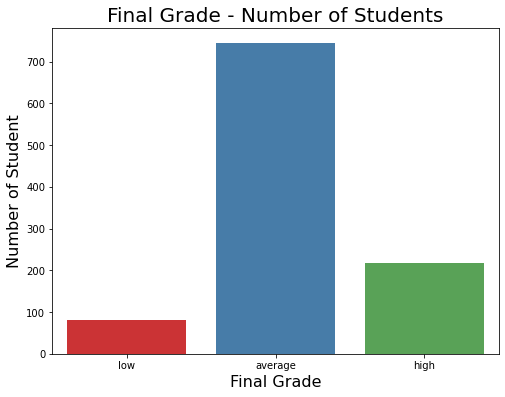

In [7]:
#visualizing the grades per number of students

plt.figure(figsize=(8,6))
sns.countplot(stu["grades"], order=["low","average","high"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

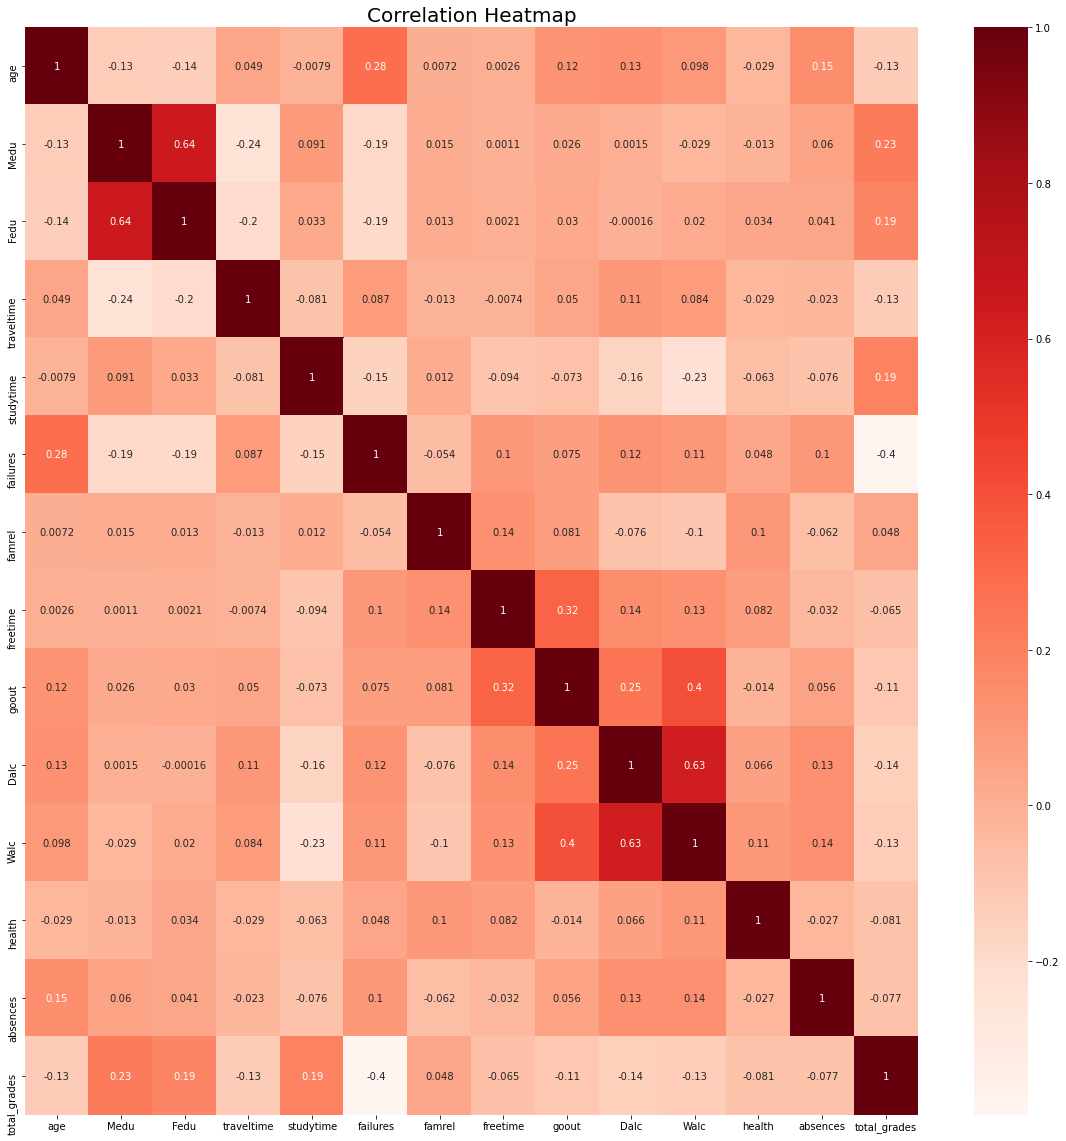

In [8]:
#describing by correlation matrix

corr=stu.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

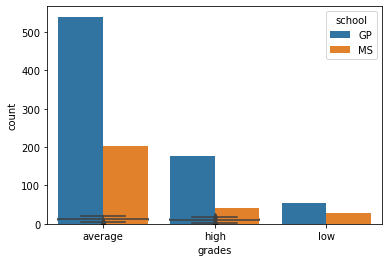

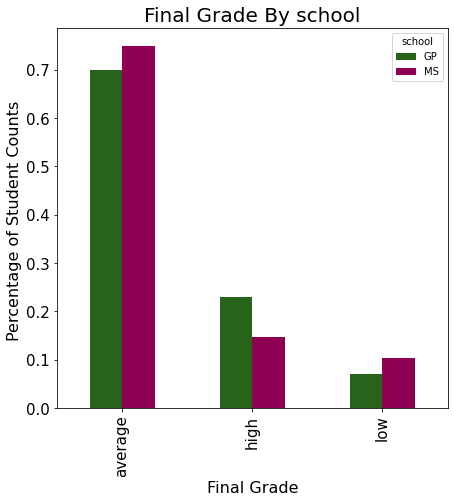

In [9]:


#comparing school with grades
sns.boxplot(x="school", y="total_grades", data=stu)

school_counts=stu["school"].value_counts().to_frame()
school_counts.rename(columns={"school":"school_counts"},inplace=True)
school_counts.index.name='school'

school_sns=sns.countplot(hue=stu["school"],x=stu["grades"],data=stu)

#crosstab is expanded form of value counts the the factors inside any variables
perc=(lambda col:col/col.sum())
index=["average","high","low"]
schooltab1=pd.crosstab(columns=stu.school,index=stu.grades)

school_perc=schooltab1.apply(perc).reindex(index)

school_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By school', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#so by graph we know that school has impact on grades of students

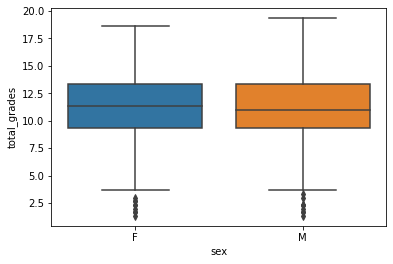

In [10]:
#comparing sex with grades
sns.boxplot(x="sex", y="total_grades", data=stu)
school_counts=stu["sex"].value_counts()

#as the graph of sex nearly overlaps so it will not have impact on grades
stu=stu.drop(["sex"],axis=1)

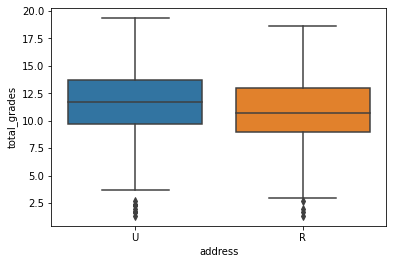

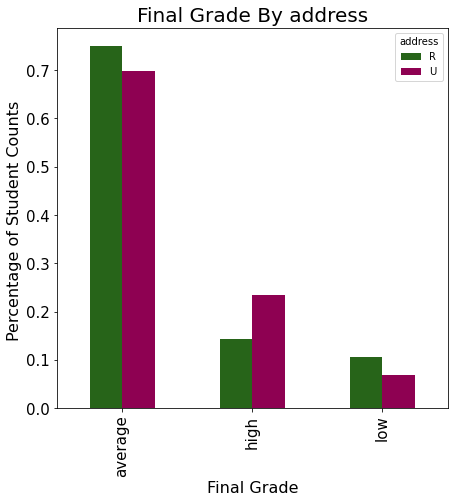

In [11]:
#comparing address with grades
sns.boxplot(x="address", y="total_grades", data=stu)
index=["average","high","low"]
addresstab1=pd.crosstab(columns=stu.address,index=stu.grades)

address_perc=addresstab1.apply(perc).reindex(index)

address_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By address', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#address is factor for the grades

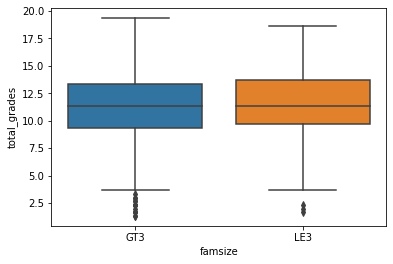

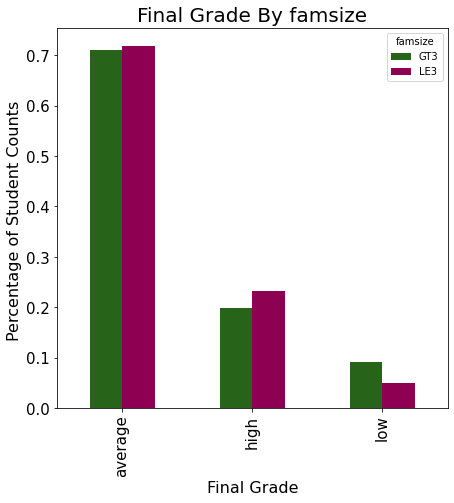

In [14]:
#comparing famsize with grades
sns.boxplot(x="famsize", y="total_grades", data=stu)
famsizetab1=pd.crosstab(columns=stu.famsize,index=stu.grades)

famsize_perc=famsizetab1.apply(perc).reindex(index)

famsize_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By famsize', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#famsize has great impact on grades

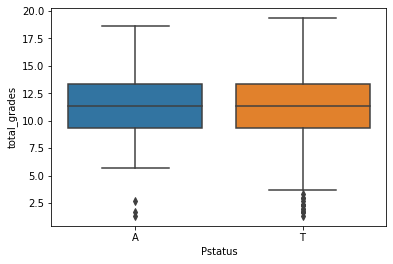

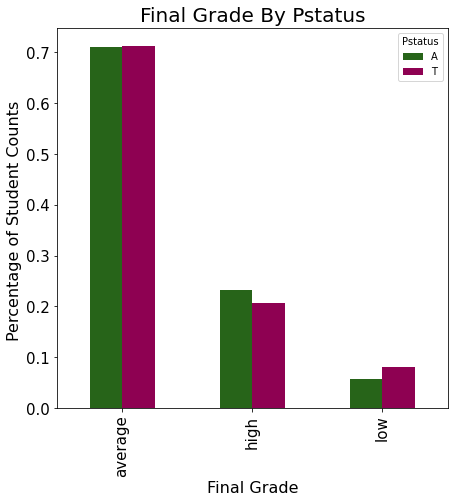

In [15]:
#comparing pstatus with grades
sns.boxplot(x="Pstatus", y="total_grades", data=stu)
Pstatustab1=pd.crosstab(columns=stu.Pstatus,index=stu.grades)

Pstatus_perc=Pstatustab1.apply(perc).reindex(index)

Pstatus_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By Pstatus', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#it is not a good factor

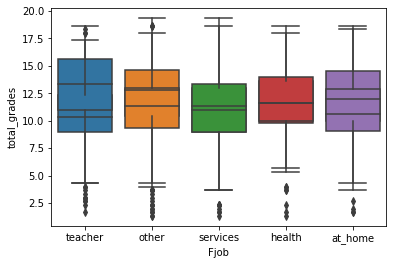

In [16]:
#comparing jobs
sns.boxplot(x="Mjob", y="total_grades", data=stu)
sns.boxplot(x="Fjob", y="total_grades", data=stu)
stu1=stu[["Fjob","Mjob","total_grades"]]
job_grp=stu1.groupby(['Mjob','Fjob'],as_index=False).mean()
job_pivot=job_grp.pivot(index='Mjob',columns='Fjob',values='total_grades')

#so father and mother jobs has great impact on grades

<AxesSubplot:xlabel='reason', ylabel='total_grades'>

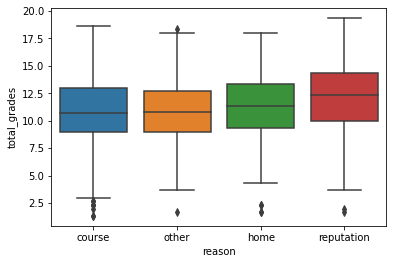

In [17]:
#comparing reasons
sns.boxplot(x="reason", y="total_grades", data=stu)

#it has impact on the grades

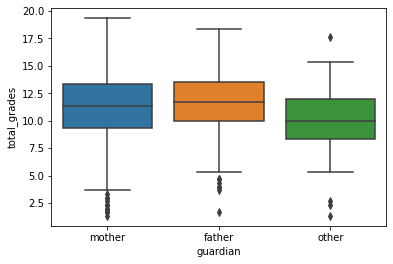

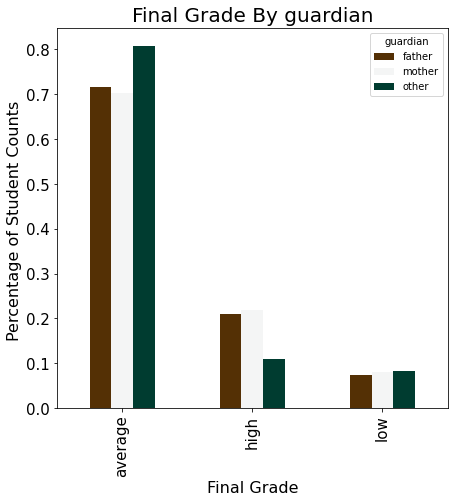

In [18]:
#comparing guardians
sns.boxplot(x="guardian", y="total_grades", data=stu)

guardiantab1=pd.crosstab(columns=stu.guardian,index=stu.grades)
guardian_perc=guardiantab1.apply(perc).reindex(index)
guardian_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By guardian', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#so guardian has grat impact on grades

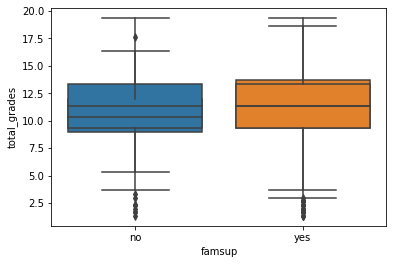

In [19]:
#support of family and school
sns.boxplot(x="schoolsup", y="total_grades", data=stu)

#it is the important factor
sns.boxplot(x="famsup", y="total_grades", data=stu)
stu[["famsup","total_grades"]].groupby(["famsup"],as_index=False).mean()

#famsup does not have great impact on grades 
stu=stu.drop(["famsup"],axis=1) 

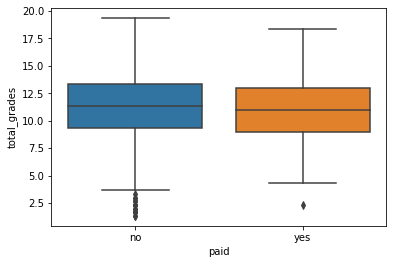

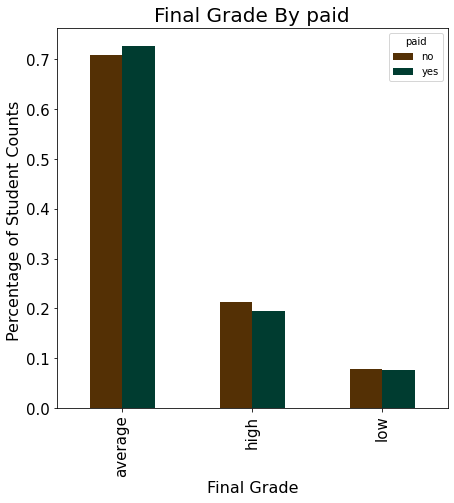

In [20]:
#comparing paid attributes
sns.boxplot(x="paid", y="total_grades", data=stu)
paidtab1=pd.crosstab(columns=stu.paid,index=stu.grades)
paid_perc=paidtab1.apply(perc).reindex(index)
paid_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By paid', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#paid does not have much influence on grades so
stu=stu.drop(["paid"],axis=1)

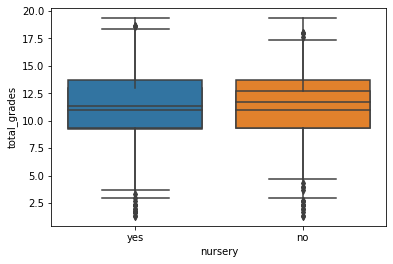

In [21]:
sns.boxplot(x="activities", y="total_grades", data=stu)
#is has great impact on student perforamnce

sns.boxplot(x="nursery", y="total_grades", data=stu)
#it does not have great impact on performance

stu=stu.drop(["nursery"],axis=1)

<AxesSubplot:xlabel='internet', ylabel='total_grades'>

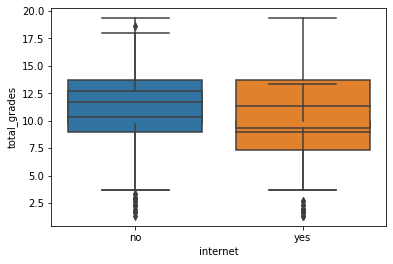

In [22]:
#comparing if higher educatiob of students have impact on performance
sns.boxplot(x="higher", y="total_grades", data=stu)

sns.boxplot(x="internet", y="total_grades", data=stu)
#internet also have great impact on performance of individual

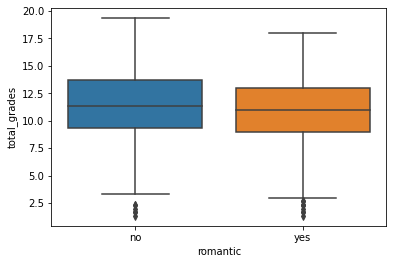

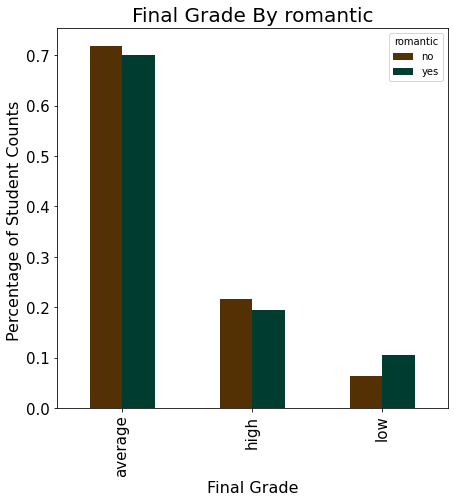

In [23]:
#high school romance impact on the performance of students
sns.boxplot(x="romantic", y="total_grades", data=stu)
romantictab1=pd.crosstab(columns=stu.romantic,index=stu.grades)
romantic_perc=romantictab1.apply(perc).reindex(index)
romantic_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By romantic', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#so high school romance leads to decline in performance of students
#beware of that

In [24]:
#labels of remaining features
stu.columns

Index(['school', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'total_grades', 'grades'],
      dtype='object')

In [25]:
#creating dummies to replace string with categorical

stu1=pd.get_dummies(stu,columns=["school","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", 'schoolsup', 'activities', 'higher', 'internet', 'romantic' ])
test_stu1=stu1["grades"]
teststu1=stu1["total_grades"]
train_stu1=stu1.drop(['total_grades','grades'],axis=1)
train_stu=train_stu1.values
train_stu1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,1,0,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,1,0,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


<AxesSubplot:xlabel='age', ylabel='total_grades'>

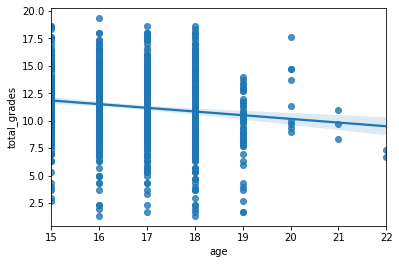

In [26]:
#comparing age with marks
sns.regplot(x="age",y="total_grades",data=stu)

In [27]:
#pearson coeffiecient
stu[["age","total_grades"]].corr()

#p-value
pearson_coef , p_value=stats.pearsonr(stu["age"],stu["total_grades"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#age is not a good factor

The Pearson Correlation Coefficient is -0.12913452270388814  with a P-value of P = 2.8516659922093794e-05


In [28]:
#using backward elimination for finding optimal featrures

#if p-value is greater than 0.6 than we will removethat feature
X=np.append(arr=np.ones((1044,1)).astype(int),values=train_stu,axis=1)
X_opt = X[:, [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_grades   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     25.74
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.53e-47
Time:                        14:41:21   Log-Likelihood:                -2574.8
No. Observations:                1044   AIC:                             5174.
Df Residuals:                    1032   BIC:                             5233.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9881      0.646     17.005      0.000       9.720      12.256
x1             0.3571      0.105      3.394      0.001       0.151       0.564
x2             0.1062      0.106      0.998      0.318      -0.103       0.315
x3            -0.1982      0.126     -1.570      0.117      -0.446       0.050
x4             0.4150      0.111      3.743      0.000       0.197       0.632
x5            -1.6060      0.142    -11.344      0.000      -1.884      -1.328
x6             0.1104      0.097      1.133      0.258      -0.081       0.302
x7            -0.1906      0.085     -2.235      0.026      -0.358      -0.023
x8            -0.2267      0.126     -1.798      0.072      -0.474       0.021
x9             0.0377      0.096      0.391      0.696      -0.152       0.227
x10           -0.1392      0.064     -2.190      0.029      -0.264      -0.014
x11           -0.0185      0.015     -1.269      0.205      -0.047       0.010
==============================================================================
Omnibus:                       40.630   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.582
Skew:                          -0.426   Prob(JB):                     2.82e-11
Kurtosis:                       3.625   Cond. No.                         73.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#now we merge our training data
train_x=np.concatenate((X_opt,X[:,14:49]),axis=1)
stu[["Medu","total_grades"]].corr()
stu[["Fedu","total_grades"]].corr()

,Fedu,total_grades
Fedu,1.00000,0.18661
total_grades,0.18661,1.00000


In [30]:
#final feature extraction cleaning
train_stu2=train_stu1.drop(["age","freetime"],axis=1)
np1=[1 for i in range(0,1044)]
train_stu2.insert(loc=0,column= "noimprotance", value=np1)

In [31]:
#now after getting the proper features we will split the data
train_stu2.columns
train_stu2.head(30)

,noimprotance,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,4,4,2,2,0,4,4,1,1,...,0,1,1,0,0,1,1,0,1,0
1,1,1,1,1,2,0,5,3,1,1,...,1,0,1,0,0,1,0,1,1,0
2,1,1,1,1,2,0,4,2,2,3,...,0,1,1,0,0,1,0,1,1,0
3,1,4,2,1,3,0,3,2,1,1,...,1,0,0,1,0,1,0,1,0,1
4,1,3,3,1,2,0,4,2,1,2,...,1,0,1,0,0,1,1,0,1,0
5,1,4,3,1,2,0,5,2,1,2,...,1,0,0,1,0,1,0,1,1,0
6,1,2,2,1,2,0,4,4,1,1,...,1,0,1,0,0,1,0,1,1,0
7,1,4,4,2,2,0,4,4,1,1,...,0,1,1,0,0,1,1,0,1,0
8,1,3,2,1,2,0,4,2,1,1,...,1,0,1,0,0,1,0,1,1,0
9,1,3,4,1,2,0,5,1,1,1,...,1,0,0,1,0,1,0,1,1,0


In [32]:
#splitting dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(train_x,test_stu1, test_size = 0.2, random_state = 0)

In [34]:
#features by importance using RFC
rf_classifier=RandomForestClassifier(n_estimators=80,criterion="entropy",random_state=0)
rf_classifier.fit(X_train,y_train)

sv_classifier = SVC(kernel = 'rbf', random_state = 0)
sv_classifier.fit(X_train, y_train)

lr_classifier=LogisticRegression(random_state=0)
lr_classifier.fit(X_train,y_train)

kn_classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn_classifier.fit(X_train,y_train)

nb_classifier=GaussianNB()
nb_classifier.fit(X_train, y_train)

/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [38]:
#Predictions Performance Scores

rf_score = rf_classifier.score(X_test, y_test)
sv_score = sv_classifier.score(X_test, y_test)
lr_score = lr_classifier.score(X_test, y_test)
kn_score = kn_classifier.score(X_test, y_test)
nb_score = nb_classifier.score(X_test, y_test)

print('---------Prediction Scores------')

print('Random Forest Prediction Score is', rf_score*100,'%')
print('Support Vector Prediction Score is', sv_score*100,'%')
print('Logistic Regression Prediction Score is', lr_score*100,'%')
print('K-Nearest Classifier Prediction Score is', kn_score*100,'%')
print('Naive Bayes Prediction Score is', nb_score*100,'%')

---------Prediction Scores------
Random Forest Prediction Score is 76.55502392344498 %
Support Vector Prediction Score is 73.20574162679426 %
Logistic Regression Prediction Score is 75.5980861244019 %
K-Nearest Classifier Prediction Score is 71.29186602870813 %
Naive Bayes Prediction Score is 33.49282296650718 %


In [40]:
#predicting the test set re4sults
yrf = rf_classifier.predict(X_test)
ysv = sv_classifier.predict(X_test)
ylr = lr_classifier.predict(X_test)
ykn = kn_classifier.predict(X_test)
ynb = nb_classifier.predict(X_test)

#determining the precision,recall and f1-score 
RF_report=classification_report(y_test,yrf)
SV_report=classification_report(y_test,ysv)
LR_report=classification_report(y_test,ylr)
KN_report=classification_report(y_test,ykn)
NB_report=classification_report(y_test,ynb)

/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print('Random Forest Classifier Report:')
print(RF_report)

Random Forest Classifier Report:
              precision    recall  f1-score   support

     average       0.79      0.93      0.85       153
        high       0.67      0.42      0.52        38
         low       0.40      0.11      0.17        18

    accuracy                           0.77       209
   macro avg       0.62      0.49      0.51       209
weighted avg       0.73      0.77      0.73       209



In [42]:

print('Support Vector Classifier Report:')
print(SV_report)

Support Vector Classifier Report:
              precision    recall  f1-score   support

     average       0.73      1.00      0.85       153
        high       0.00      0.00      0.00        38
         low       0.00      0.00      0.00        18

    accuracy                           0.73       209
   macro avg       0.24      0.33      0.28       209
weighted avg       0.54      0.73      0.62       209



In [43]:
print('Logistic Regression Classfier Report:')
print(LR_report)

Logistic Regression Classfier Report:
              precision    recall  f1-score   support

     average       0.77      0.95      0.85       153
        high       0.69      0.29      0.41        38
         low       0.40      0.11      0.17        18

    accuracy                           0.76       209
   macro avg       0.62      0.45      0.48       209
weighted avg       0.72      0.76      0.71       209



In [44]:

print('K-Nearest Classifier Report:')
print(KN_report)

K-Nearest Classifier Report:
              precision    recall  f1-score   support

     average       0.76      0.90      0.83       153
        high       0.41      0.29      0.34        38
         low       0.00      0.00      0.00        18

    accuracy                           0.71       209
   macro avg       0.39      0.40      0.39       209
weighted avg       0.63      0.71      0.67       209



In [45]:

print('Naive Bayes Classifier Report:')
print(NB_report)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

     average       0.85      0.18      0.30       153
        high       0.24      0.97      0.39        38
         low       0.22      0.28      0.24        18

    accuracy                           0.33       209
   macro avg       0.44      0.48      0.31       209
weighted avg       0.68      0.33      0.31       209

